In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import koreanize_matplotlib

### 비지도학습

#### 데이터 전처리와 스케일 조정

- Standard Scaler: 데이터의 평균을 0 표준편차1로 분포조정 :
> 일반적으로 모든 특성이 유사한 분포를 갖는 것이 중요할 때 
  -> svm, 로지스틱 회귀, 선형 회귀

- QuantileTransformer : 데이터 분포를 정규 분포로 변환 .

- MinMax Scaler: 동일한 범위 ex) [0,1] 안에 밀어넣기로 데이터 범위 통일
> 특정 범위로 스케일링 -> KNN, 거리 기반

- Robust Scaler: 데이터 이상치, 극단값 잘 잡아내서 이상치 최소화 할때
> 이상치가 많은 데이터에 적합

- Normalizer : 벡터의 길이를 1로 맞추어 방향성을 유지
> 방향이 중요한 분석(예: 문서 분석)

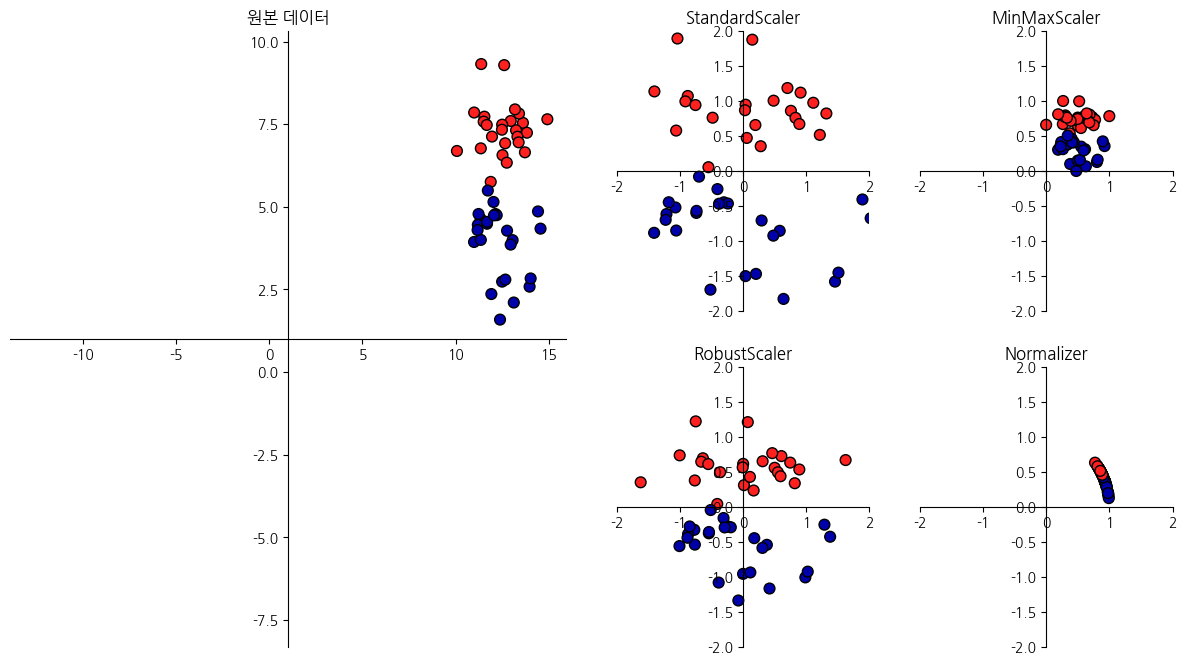

In [3]:
mglearn.plots.plot_scaling()
# 범위가 다른 여러 데이터들을 동일한 범위로 맞춰서 보자. 다들 단위도 범위도 다르니까

In [4]:
#데이터 변환 적용하기

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape, X_test.shape)


(426, 30) (143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [6]:
scaler.fit(X_train) #스케일러에는 y_train은 넘겨주지 않는다.

MinMaxScaler()

In [7]:
#scaler에 학습 후-> transform메소드를 사용해야 데이터 변환이 이루어짐
X_train_scaled=scaler.transform(X_train)
print("변환 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0)) #axis=0 붙여줘야 행방향(각 열에서) 최솟값 빼옴 
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))


변환 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
#테스트 데이터도 따로 변환 필요함

X_test_scaled=scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

#훈련데이터 범위는 0.1로 조정되었는데 test데이터는 그걸 넘어서는 들쭉날쭉임을 알 수 있음..

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


### QuantileTransformer

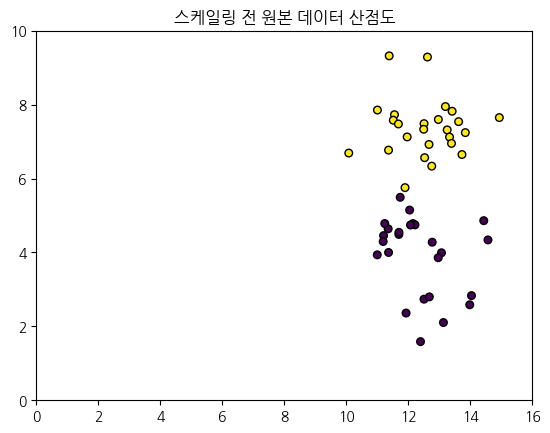

In [9]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0,16)
plt.ylim(0,10)
plt.title("스케일링 전 원본 데이터 산점도")
plt.show()

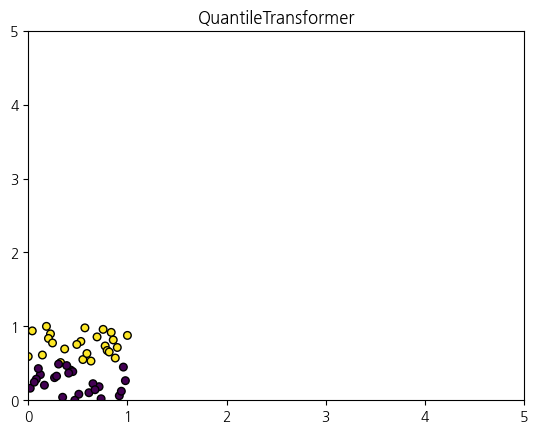

In [10]:
# 이 데이터셋에 QuantileTransformer 적용하여 스케일 변화 보기

scaler=QuantileTransformer(n_quantiles=50)
X_trans=scaler.fit_transform(X) #transform까지 함께 해야 scaler는 변환이 완료됨
plt.scatter(X_trans[:, 0], X_trans[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0,5)
plt.ylim(0,5)
plt.title(type(scaler).__name__)
plt.show()

# 해석: 스케일링 즉 변환 후에는 특성0과 특성1에서 0.1사이에 분포되어있음을 볼 수 있음 

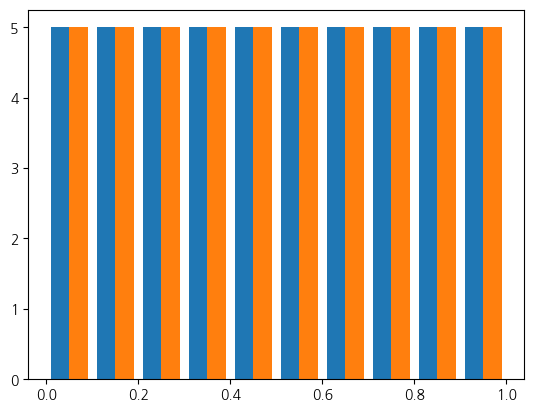

In [11]:
plt.hist(X_trans)
#변환된 데이터 히스토그램 그려봄
plt.show()

In [12]:
print(scaler.quantiles_.shape)

#scaler의 파라미터는 n_quantiles, 기본값은 1000

(50, 2)


### QuantileTransformer - n_quantiles= 파라미터로 균등 분포시키기 

In [13]:
X=np.array([[0],[5],[8],[9],[10]]) #이거 헷갈리면 안되는게 이렇게 보이지만 사실은 5행 1열(0)인덱스 임!
#밑으로 뚝뚝뚝뚝 내려가는 5행짜리 어레이
print(np.percentile(X[:,0], [0, 25, 50, 75, 100]))
#이 5행0열에서 0. 25. 50.. 이 분위에 해당하는 샘플을 뱉어줘야 하는데 5행 1열이므로
#[0]이 0이고, [5]가 25%임 다섯개 세로짜리에서 봤을 때

[ 0.  5.  8.  9. 10.]


In [14]:
X_trans = QuantileTransformer(n_quantiles=5).fit_transform(X)
#n_quantiles= 데이터의 분위 수.몇개의 구간(분위)로 나눌지 => 데이터 균등 구간으로 분배!!!!
print(np.percentile(X_trans[:,0], [0, 25, 50, 75, 100]))
#QuantileTransformer에 의해 균등분배 되었기 때문에 "데이터값"이 아니고
#균등하게 분포되고 난 후의 "분포값"을 뱉게 되는거임
print(X_trans)

[0.   0.25 0.5  0.75 1.  ]
[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


### QuntileTransformer - output_distribution 으로 "정규분포"로 출력

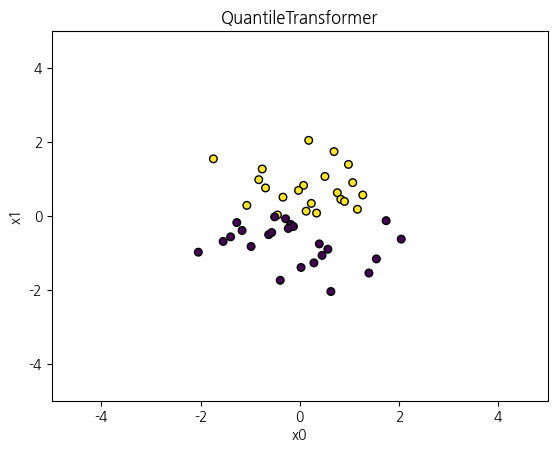

In [15]:
scaler=QuantileTransformer(output_distribution='normal', n_quantiles=50)
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3
X_trans=scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5,5)
plt.xlabel('x0')
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

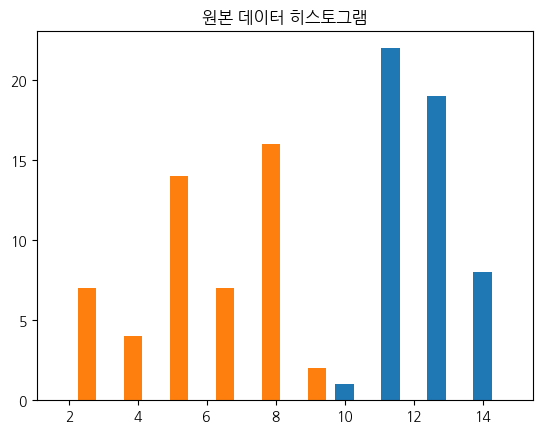

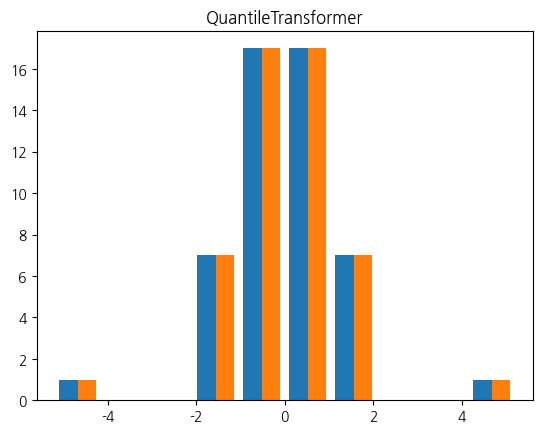

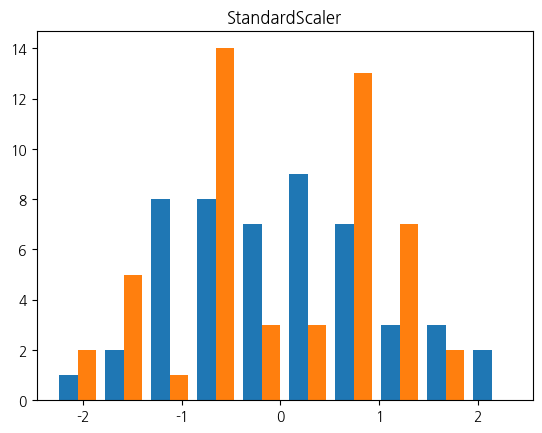

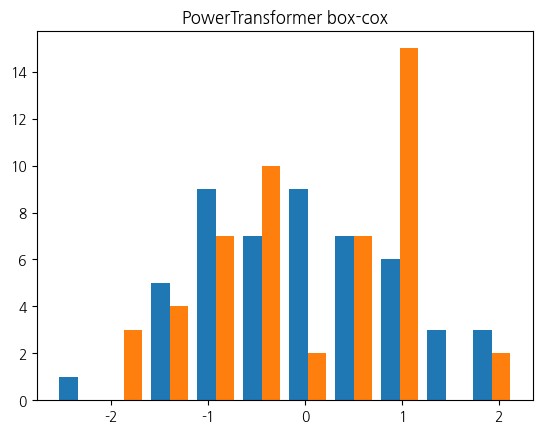

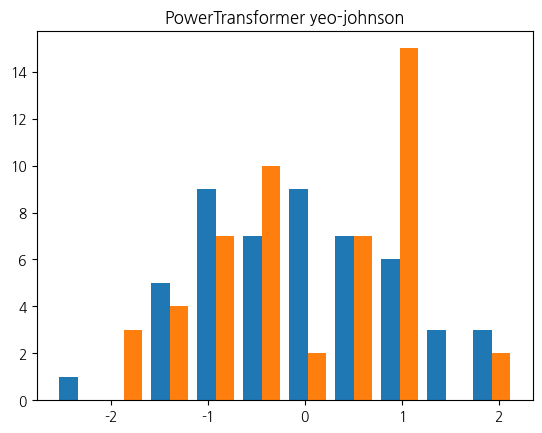

In [16]:
# 어떤 스케일링이 정규분포에 가깝게 변환할지 데이터만 보고 알기 어려움
# 그냥 모든 트랜스포머해서 어떤거 쓸지 알아보기로.

plt.hist(X)
plt.title('원본 데이터 히스토그램')
plt.show()

X_trans=QuantileTransformer(output_distribution='normal', n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans=StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans=PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans=PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

### train, test 스케일을 같은 방법으로 조정하기

Text(0.5, 1.0, '스케일 조정된 데이터')

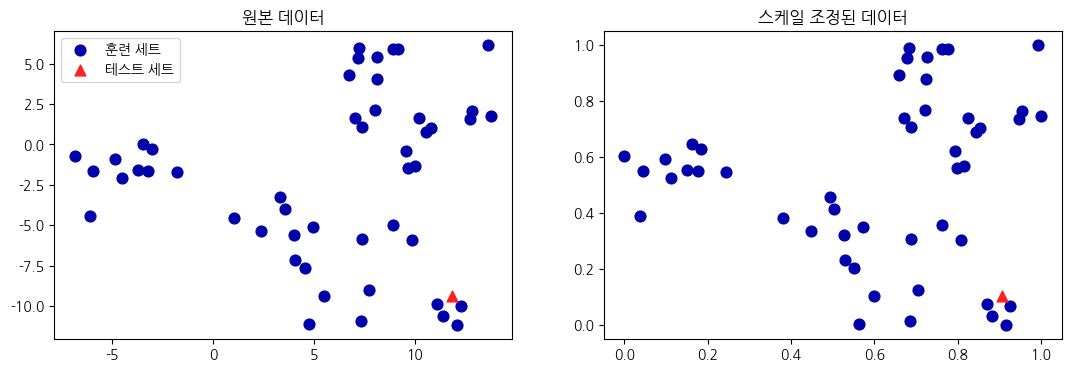

In [17]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 데이터 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=1)

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# 원본 데이터 그래프
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler로 조정 - ** 스케일러 따로 조정하는게 아니고 X_train만 scaler에 훈련시키고!!! 그걸 각각 *transform 할때 X_train, X_test해야 최소.최대값이 같아짐
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일 조정된 데이터 그래프
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
svm=SVC(gamma='auto')
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm.fit(X_train, y_train)
svm.score(X_test, y_test)


0.6293706293706294

In [19]:
#MinMax로 0~1 사이로 스케일 조정하고 성능 살펴보자

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

svm.fit(X_train_scaled, y_train) #y 타겟값은 그대로지 당연히! 특성만 스케일링 하면 됨
svm.score(X_test_scaled, y_test)

#스케일링 후 성능이 좋아진거 볼 수 있음 

0.951048951048951

### 차원 축소-주성분 분석(PCA)

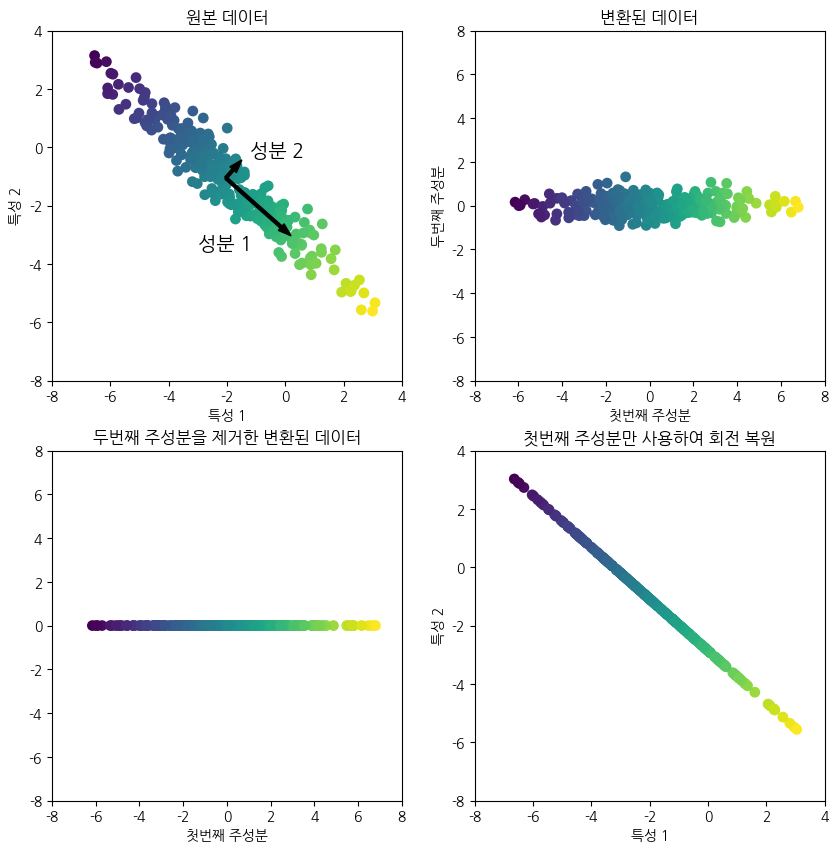

In [20]:
mglearn.plots.plot_pca_illustration()

#주성분 - 주된 분산의 '방향'

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
#preprocessing에서 scaler

cancer=load_breast_cancer()

scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)

In [22]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_scaled) #pca 모델에다가 우리가 스케일 변환한 cancer.data를 훈련시킨다.

X_pca=pca.transform(X_scaled) 
# 중요!!! pca.fit 훈련 후 pca는 주성분 계산이 완료되었지만 축에 나타나기는 위 그림에서 0행0열의 상태임 (새로운 축으로 변환되지 않음)
# 새로운 축 변환을 위해서는 transform 메소드를 호출해야
# 새로운 주성분 축(차원 축소된 공간)으로 투영-이 단계에서 데이터의 차원이 축소됨.
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


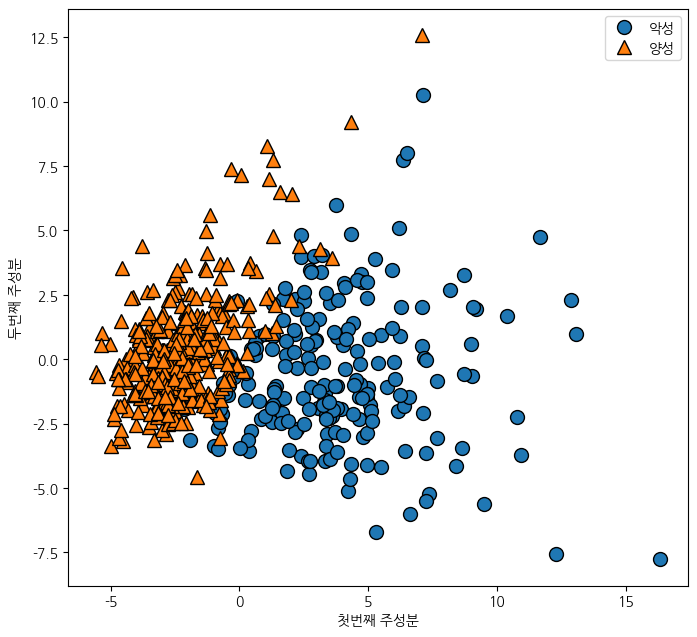

In [23]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
print(X_pca)

In [24]:
print("PCA 주성분 형태:", pca.components_.shape)

# 축은 두개고 각각 30개(cancer.data의 30열)의 가중치를 가지고 있다. 

PCA 주성분 형태: (2, 30)


In [25]:
pca.components_
#첫번째 주성분에서 첫번째 특성의 가중치  0.21890244, 두번째 특성의 가중치 0.10372458 .. 
#두번째 주성분에서 첫번째 특성의 가중치 -0.23385713 .. 

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Text(0, 0.5, '주성분')

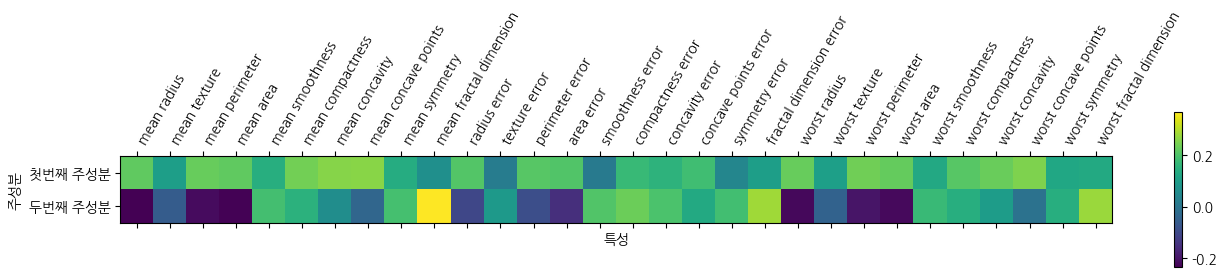

In [26]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["첫번째 주성분", "두번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
                 cancer.feature_names, rotation=60, ha='left') #xticks는 (위치, 텍스트, 회전각, 글씨정렬법) 임. feature_names 길이만큼 range생성해서 feature_names 하나하나 할당
plt.xlabel("특성")
plt.ylabel("주성분")

#해석 - 첫번째 주성분은 모두다 양수 부호=>공통의 상호관계가 있다. 비례하는.. 
# 두번째 주성분은 섞여 있어 축의 의미를 설명하기 어려움..

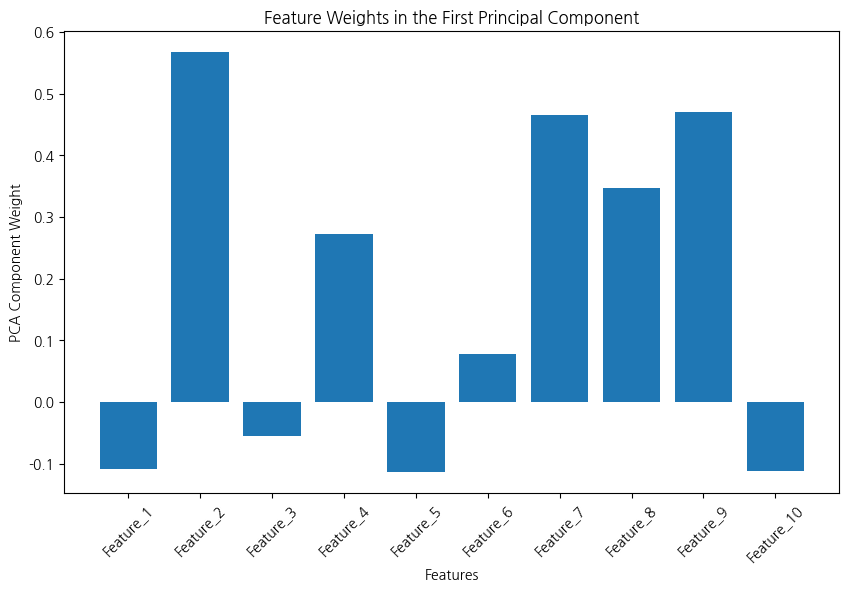

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. 데이터 준비
np.random.seed(0)
data = np.random.rand(100, 10)  # 100개의 샘플, 10개의 특징
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 11)])

# 2. 데이터 표준화 - PCA 수행 전 스케일러로 조정
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. 주성분 분석(PCA) 수행 - 스케일 된 데이터로 fit
pca = PCA(n_components=2)
pca.fit(scaled_data) #분산을 설명하는 주성분 방향 두개를 찾는다. 왼쪽그래프
principal_components = pca.transform(scaled_data)
#principal_components은 두 개의 배열로 나옴. 
#주성분 분석으로 변환되고 차원 축소가 된 후의 데이터를 principal_components 라 칭하겠다. 
# *** 주성분 분석의 끝은 모델.transform 해주어야 차원 축소의 형태로 변환이 됨 *** 오른쪽 그래프.

# 4. 첫 번째 주성분의 가중치 확인
first_pc_weights = pca.components_[0]

# 5. 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.bar(x=[f'Feature_{i}' for i in range(1, 11)], height=first_pc_weights)
plt.xlabel('Features')
plt.ylabel('PCA Component Weight')
plt.title('Feature Weights in the First Principal Component')
plt.xticks(rotation=45)
plt.show()

In [29]:
pca.components_[0]

array([-0.10858352,  0.5673421 , -0.05549353,  0.27224202, -0.11335759,
        0.07732939,  0.46492503,  0.34690562,  0.47042531, -0.11184256])

### t-SNE

In [31]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

In [40]:
data = load_digits()
X = data.data
y = data.target
target_names = data.target_names

In [39]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

C:\Users\user\AppData\Local\Temp\ipykernel_53980\711624905.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(target_names))  # 색상 맵 생성
C:\Users\user\AppData\Local\Temp\ipykernel_53980\711624905.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


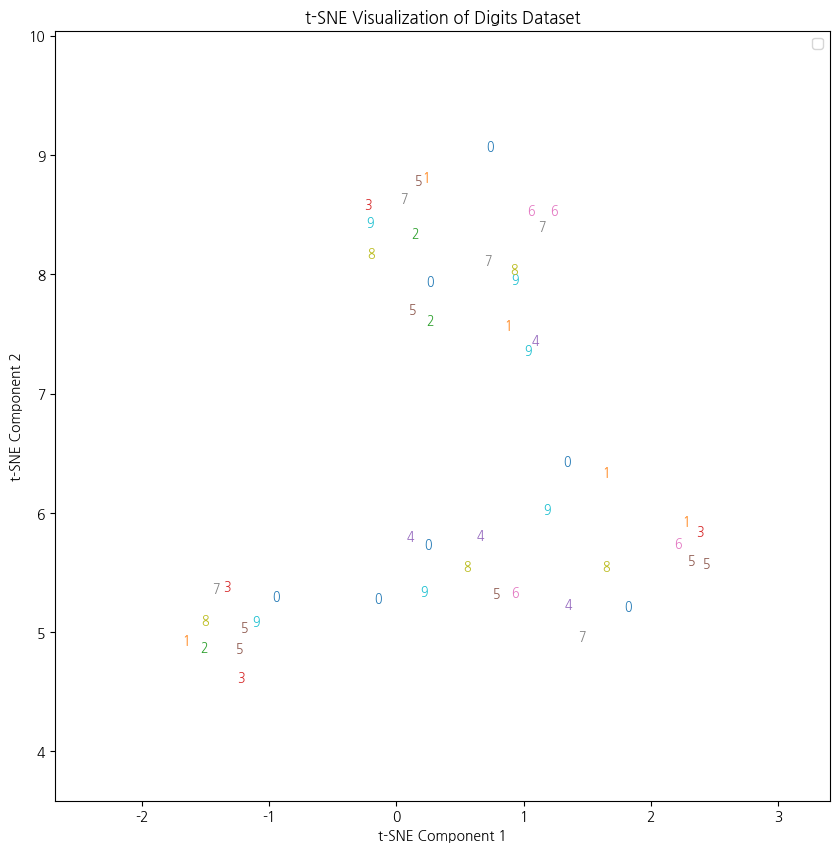

In [45]:
# 색상 지정
colors = plt.cm.get_cmap('tab10', len(target_names))  # 색상 맵 생성

# 플롯 설정
plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1) #경계-최소의-1, 최대의+1 해서 여유있게 
plt.ylim(X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1)

# 데이터 포인트와 레이블 시각화
for i in range(len(X_tsne)):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]), color=colors(y[i]), fontsize=9)
    #플롯에 "텍스트"형태로 추가하겠다.
    #(x좌표, y좌표, 레이블을 문자열로 변환하고, 그 y[i]별로 색상 다르게, 텍스트 크기)

# 축 레이블 및 제목 추가
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Digits Dataset')
plt.legend()
plt.show()